# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np

from inauguralproject import HouseholdSpecializationModelClass
%reload_ext autoreload
%autoreload 2

# Question 1

**Explain how you solve the model**

In [23]:
# code for solving the model (remember documentation and comments)

model = HouseholdSpecializationModelClass()

a = [0.25, 0.5, 0.75]
s = [0.5, 1, 1.5]


for i in s:
    model.par.sigma = i
    for j in a:
        model.par.alpha = j
        opt = model.solve_discrete()
        HF = opt.HF
        HM = opt.HM
        HFdividedHM = opt.HF/opt.HM

        print(f"alpha={j}, sigma={i}, HF={HF}, HM={HM}, HF/HM={HFdividedHM}")




c:\Users\simon\OneDrive\Dokumente\KU - Master\2.Semester\Python Intro\projects-2023-mes\projects-2023-mes-4\inauguralproject\inauguralproject.py:80: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha=0.25, sigma=0.5, HF=3.0, HM=5.5, HF/HM=0.5454545454545454
alpha=0.5, sigma=0.5, HF=4.5, HM=4.5, HF/HM=1.0
alpha=0.75, sigma=0.5, HF=5.5, HM=3.0, HF/HM=1.8333333333333333
alpha=0.25, sigma=1, HF=2.0, HM=6.5, HF/HM=0.3076923076923077
alpha=0.5, sigma=1, HF=4.5, HM=4.5, HF/HM=1.0
alpha=0.75, sigma=1, HF=6.5, HM=2.0, HF/HM=3.25
alpha=0.25, sigma=1.5, HF=1.5, HM=7.0, HF/HM=0.21428571428571427
alpha=0.5, sigma=1.5, HF=4.5, HM=4.5, HF/HM=1.0
alpha=0.75, sigma=1.5, HF=7.0, HM=1.5, HF/HM=4.666666666666667


# Question 2

Explain your code and procedure

Kurpark_h: [0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
BWK_w: [-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


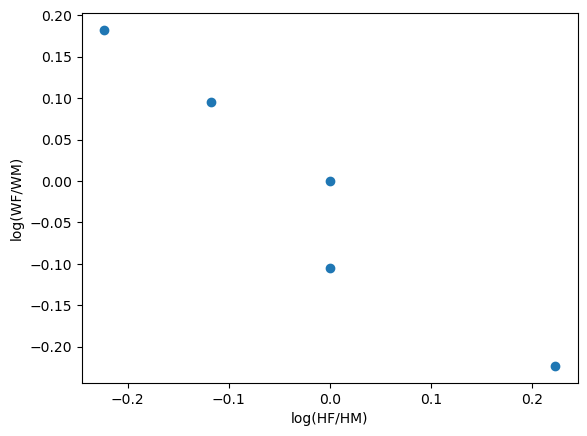

In [24]:
# code

import math
from matplotlib import pyplot as plt

model = HouseholdSpecializationModelClass()

w = [0.8, 0.9, 1, 1.1, 1.2]
Kurpark_h = []

for i in w:
    model.par.wF = i
    justus = model.solve_discrete()
    HF = justus.HF
    HM = justus.HM
    Kurpark_h.append(math.log(HF/HM))

BWK_w = []

for j in w:
    BWK_w.append(math.log(j/1))

print("Kurpark_h:", Kurpark_h)
print ("BWK_w:", BWK_w)


plt.scatter(Kurpark_h, BWK_w)
plt.ylabel("log(WF/WM)")
plt.xlabel("log(HF/HM)")
plt.show()


    

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.